# Project Portfolio: Restaurant Review Sentiment Analysis

Author : Malick .H.B (TallBI services)

## Introduction:

Most of the Restaurants ask reviews to the customers and based on the reviews the restaurant can improve the customer satisfaction. So Reviews plays a vital role for the successful growth of the restaurant.
In this project, we will create a sentiment analysis model for  restaurant reviews using Natural Language Processing (NLP) techniques. The goal is to predict whether a restaurant review is positive or negative based on the text content. Sentiment analysis has various applications, including understanding customer opinions, improving services, and making data-driven decisions.

## Dataset

The dataset that we are using is taking from Kaggle website .The dataset consists of 1000 rows and 2 columns. **Review** Column consist of customer reviews and **liked** column consist of 0 and 1. If the review is positive, 1 and if negative, 0

## Data Exploration and Preprocessing:

### Import the Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import the dataset

In [50]:
dataset = pd.read_csv('Restaurant_Reviews.tsv' , delimiter = '\t' , quoting= 3)

In [51]:
dataset.head(15)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [52]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [53]:
# How many reviews do we have?
print('There are', dataset.shape[0], 'reviews in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(dataset[dataset.duplicated()]))

# Do we have missing values?
missing_values = dataset.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', dataset.isnull().sum().sum())

There are 1000 reviews in this dataset
Number of Duplicates: 4
Number of Missing Values by column:
 Review    0
Liked     0
dtype: int64
Number of Missing Values: 0


Let's Review the duplicates values.

Previously we see that there are 4 duplicates in the dataset ,Let's What are these duplicates values.

In [54]:
# get all duplicate rows
duplicate_rows = dataset[dataset.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Display the 4 pairs of duplicates
duplicate_pairs = sorted_duplicates.head(10)
duplicate_pairs

,Review,Liked
334,I love this place.,1
814,I love this place.,1
380,I won't be back.,0
843,I won't be back.,0
505,I would not recommend this place.,0
846,I would not recommend this place.,0
383,The food was terrible.,0
816,The food was terrible.,0


In [55]:
# Drop the duplicates values
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [56]:
print('Number of Duplicates:', len(dataset[dataset.duplicated()]))


Number of Duplicates: 0


In [57]:
# Visualize distribution of sentiments( Liked : 1 0r 0)
sentiment_counts = dataset['Liked'].value_counts()
print(sentiment_counts)

1    499
0    497
Name: Liked, dtype: int64


## Text Cleaning and Preprocessing:

In this section, we delve into the essential process of text cleaning and preprocessing, a foundational step in any Natural Language Processing (NLP) project. Raw text data, such as the restaurant reviews we're working with, often contains noise and irregularities that can hinder the performance of machine learning models. Our objective here is to transform the text into a structured and more manageable format, optimizing it for subsequent analysis.

**Step 1 :** Regular Expression Substitution (re.sub): We employ regular expressions to remove any characters that are not alphabetical letters. This eliminates numbers, special symbols, and punctuations that are not relevant to sentiment analysis. The goal is to retain only the textual content of the reviews.

**Step 2 :** **Lowercasing:** We convert the entire review to lowercase. This standardizes the text and ensures that the same words in different cases are treated as identical.

**Step 3 :Tokenization ** We tokenize the lowercased review into individual words .

**Step 4   Stemming**:then apply stemming using the Porter Stemmer algorithm. Stemming involves reducing words to their root form, removing suffixes and prefixes. This helps in consolidating related words and reducing vocabulary size. (e.g : Loved,Loving,Lover --> Love)

**Step 5 Stopword Removal:**  We remove common English stopwords, such as "and," "the," "is," etc., which add little meaning to the context and can be safely discarded.

In [58]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

corpus = []
for i in range(0, len(dataset)):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) # Step1
  review = review.lower()                                 # Step2
  review = review.split()                                 # Step 3
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]  # Step4 and 5
  review = ' '.join(review)
  corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

The result is a cleaned and preprocessed corpus of reviews, where each review is a sequence of meaningful, stemmed words. This transformation sets the stage for effective feature extraction and model training in subsequent stages of our sentiment analysis project.

## Creating text representation and the Bag of Word model

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words representation
cv = CountVectorizer(max_features=1500)
X_bow = cv.fit_transform(corpus).toarray()

# TF-IDF representation
tfidf = TfidfVectorizer(max_features=1500)
X_tfidf = tfidf.fit_transform(corpus).toarray()


In [61]:

y = dataset.iloc[:, -1].values

## Exploratory Data Analysis (EDA):

Visualize the top 20 most common words

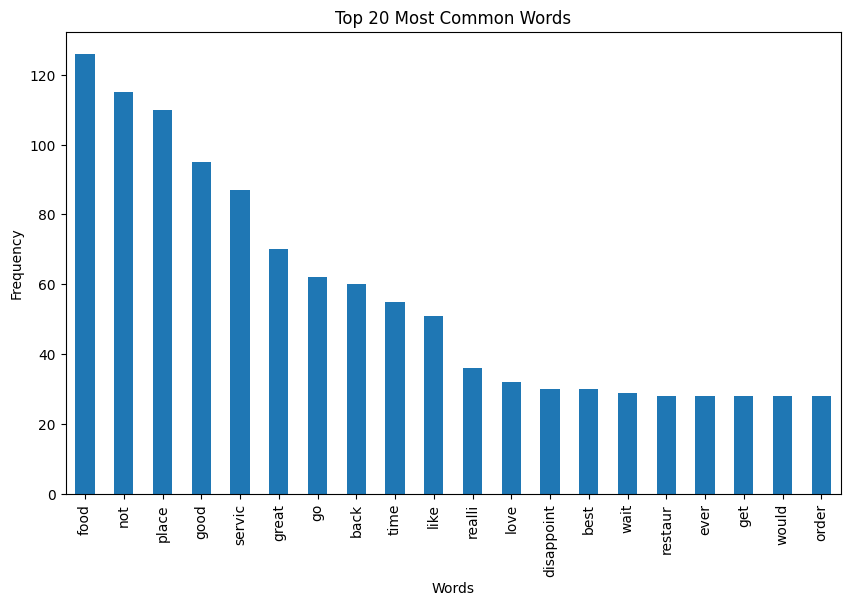

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Visualize word frequency
word_freq = pd.Series(' '.join(corpus).split()).value_counts()
word_freq[:20].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()



Let's Visualize the The wordcloud for the postive and negative reviews

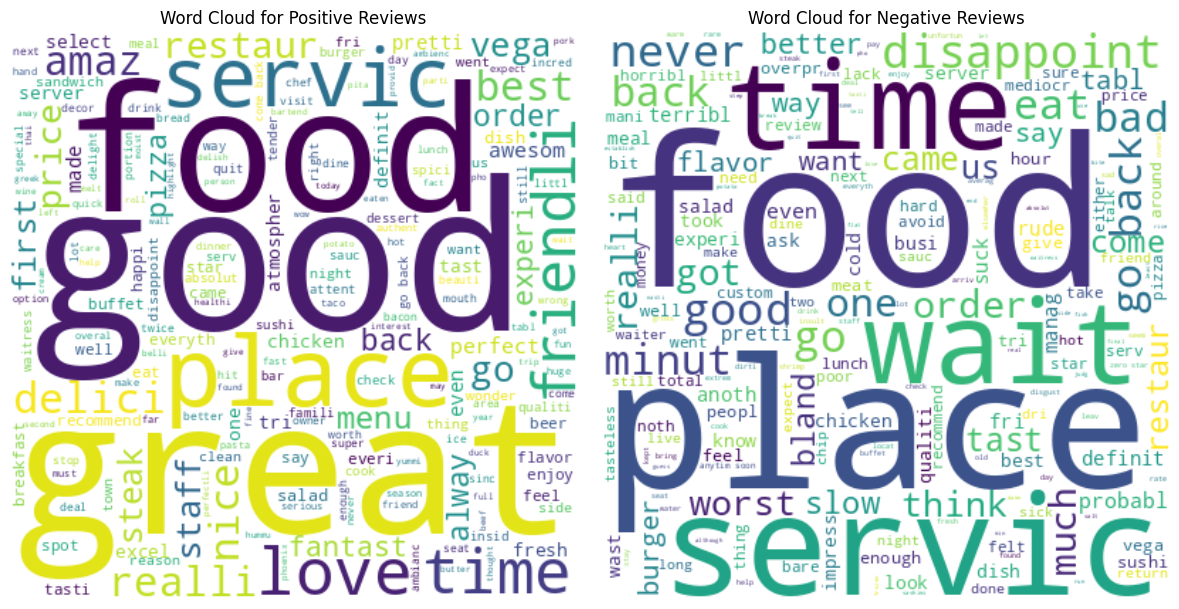

In [63]:
# Word cloud for positive and negative reviews
positive_corpus = ' '.join([review for review, liked in zip(corpus, dataset['Liked']) if liked == 1])
negative_corpus = ' '.join([review for review, liked in zip(corpus, dataset['Liked']) if liked == 0])

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Plot positive word cloud
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=400, height=400, background_color='white').generate(positive_corpus)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

# Plot negative word cloud
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=400, height=400, background_color='white').generate(negative_corpus)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Splitting the dataset into the Training set and Test set

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

## Model Selection and Training

In [65]:
# Initialize models
naive_bayes = MultinomialNB()
svm_classifier = SVC(kernel='linear', random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
naive_bayes.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

Naive Bayes Model:
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       106
           1       0.82      0.70      0.76        94

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



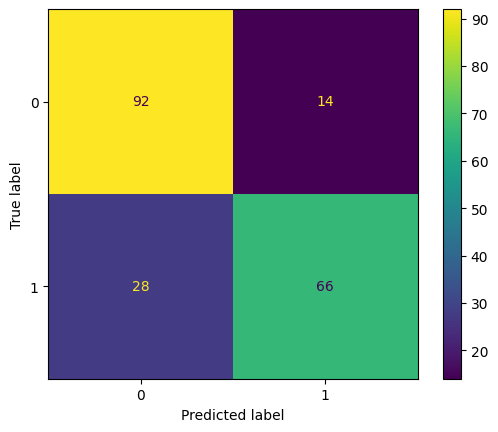

SVM Model:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       106
           1       0.84      0.71      0.77        94

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



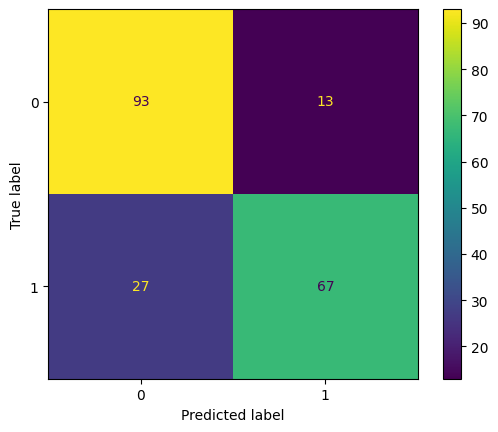

Random Forest Model:
Accuracy: 0.765
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       106
           1       0.82      0.64      0.72        94

    accuracy                           0.77       200
   macro avg       0.78      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



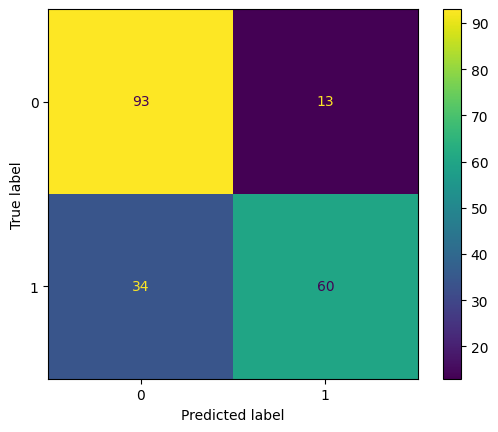

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model_and_plot(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(report)

    # Create a confusion matrix display
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

print("Naive Bayes Model:")
evaluate_model_and_plot(naive_bayes, X_test, y_test)

print("SVM Model:")
evaluate_model_and_plot(svm_classifier, X_test, y_test)

print("Random Forest Model:")
evaluate_model_and_plot(random_forest, X_test, y_test)


## Conclusion:

**Analysis:**

In this analysis, we have evaluated three different machine learning models - Naive Bayes, SVM (Support Vector Machine), and Random Forest - to predict the sentiment of restaurant reviews as either positive (1) or negative (0). Let's break down the results and assess the performance of each model.

**Naive Bayes Model:**
The Naive Bayes model achieved an accuracy of approximately 0.79. This indicates that around 79% of the reviews were correctly classified by the model. The precision for class 0 (negative sentiment) is 0.77, which means that when the model predicts a review to be negative, it is correct 77% of the time. The recall for class 0 is 0.87, indicating that the model captured 87% of the actual negative reviews. For class 1 (positive sentiment), the precision is 0.82, indicating an 82% accuracy in correctly identifying positive reviews, and the recall is 0.70, capturing 70% of the actual positive reviews.

**SVM Model:**
The SVM model achieved an accuracy of 0.8, slightly higher than Naive Bayes. The precision for class 0 is 0.78, and the recall is 0.88, showing a strong ability to identify negative reviews. For class 1, the precision is 0.84, and the recall is 0.71, indicating a balanced performance in capturing positive reviews. The SVM model demonstrates a balance between precision and recall for both sentiment classes.

**Random Forest Model:**
The Random Forest model achieved an accuracy of approximately 0.765. While its accuracy is slightly lower than the other two models, it's important to consider other metrics as well. The precision for class 0 is 0.73, and the recall is 0.88, indicating that the model has a good ability to identify negative reviews. For class 1, the precision is 0.82, but the recall is 0.64, suggesting that the model struggles to capture positive reviews as effectively.

**Conclusion:**

- **Naive Bayes:** This model achieves a balanced performance between precision and recall for both classes, demonstrating reasonable classification capabilities. Its accuracy is competitive, making it a viable choice for sentiment analysis on this dataset.

- **SVM:** The SVM model excels in accurately identifying negative reviews and maintains a balanced performance in capturing positive reviews. It exhibits good accuracy and offers a well-rounded solution for sentiment classification.

- **Random Forest:** Although the Random Forest model's accuracy is slightly lower than the others, it demonstrates strong recall for negative reviews. However, its performance in capturing positive reviews lags behind. Depending on the application, fine-tuning or additional feature engineering could potentially improve its positive sentiment recall.
